**Task 4**- Traffic Accident Data Analysis

Internship Domain: Data Science

**Dataset:** US Accidents Dataset (Kaggle)

**Objective:** The objective of this task is to analyze traffic accident data to identify patterns related to road conditions, weather conditions, and time of day, and to visualize accident hotspots and contributing factors.

In [ ]:
import os
os.listdir('/kaggle/input')

['us-accidents']

In [ ]:
os.listdir('/kaggle/input/us-accidents')

['US_Accidents_March23.csv']

In [ ]:
df.shape

(7728394, 46)

In [ ]:
df.isnull().sum().sort_values(ascending=False).head(10)

End_Lat              3402762
End_Lng              3402762
Precipitation(in)    2203586
Wind_Chill(F)        1999019
Wind_Speed(mph)       571233
Visibility(mi)        177098
Wind_Direction        175206
Humidity(%)           174144
Weather_Condition     173459
Temperature(F)        163853
dtype: int64

In [ ]:
num_cols = df.select_dtypes(include=["float64", "int64"]).columns

df[num_cols] = df[num_cols].fillna(df[num_cols].median())

In [ ]:
cat_cols = df.select_dtypes(include=["object"]).columns

df[cat_cols] = df[cat_cols].fillna("Unknown")

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,36.183495,-88.02789,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,36.183495,-88.02789,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,36.183495,-88.02789,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,36.183495,-88.02789,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,36.183495,-88.02789,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [ ]:
import pandas as pd

In [ ]:
# Robust datetime parsing for mixed formats
df["Start_Time"] = pd.to_datetime(
    df["Start_Time"],
    format="mixed",
    errors="coerce"
)


In [ ]:
df["Start_Time"].isna().sum()

0

In [ ]:
# Extract hour
df["Hour"] = df["Start_Time"].dt.hour

# Create Time_of_Day feature
def time_of_day(hour):
    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 21:
        return "Evening"
    else:
        return "Night"

df["Time_of_Day"] = df["Hour"].apply(time_of_day)

df[["Start_Time", "Hour", "Time_of_Day"]].head()

,Start_Time,Hour,Time_of_Day
0,2016-02-08 05:46:00,5,Morning
1,2016-02-08 06:07:59,6,Morning
2,2016-02-08 06:49:27,6,Morning
3,2016-02-08 07:23:34,7,Morning
4,2016-02-08 07:39:07,7,Morning


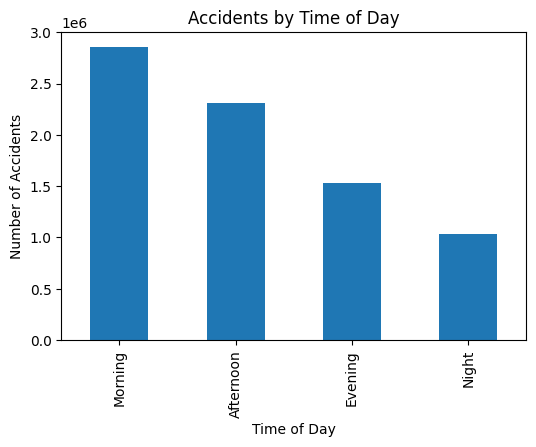

In [ ]:
import matplotlib.pyplot as plt

time_counts = df["Time_of_Day"].value_counts()

plt.figure(figsize=(6,4))
time_counts.plot(kind="bar")
plt.title("Accidents by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Number of Accidents")
plt.show()

In [ ]:
weather_counts = df["Weather_Condition"].value_counts().head(10)
weather_counts

Weather_Condition
Fair                2560802
Mostly Cloudy       1016195
Cloudy               817082
Clear                808743
Partly Cloudy        698972
Overcast             382866
Light Rain           352957
Scattered Clouds     204829
Unknown              173459
Light Snow           128680
Name: count, dtype: int64

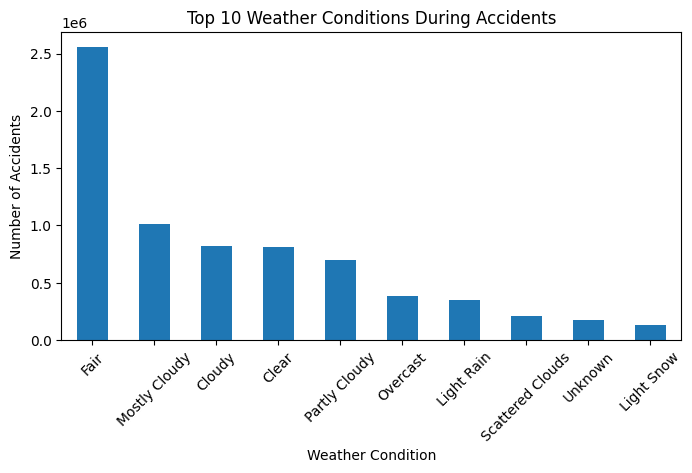

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
weather_counts.plot(kind="bar")
plt.title("Top 10 Weather Conditions During Accidents")
plt.xlabel("Weather Condition")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.show()

In [ ]:
df["Visibility_Level"] = pd.cut(
    df["Visibility(mi)"],
    bins=[0, 1, 3, 6, 10, 20, 100],
    labels=["Very Low", "Low", "Moderate", "Good", "Very Good", "Excellent"]
)

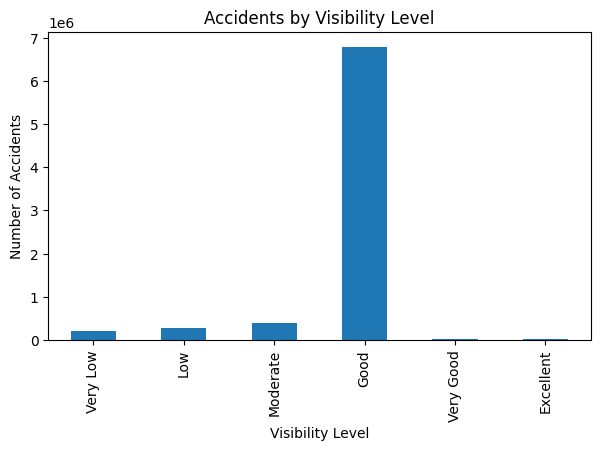

In [ ]:
visibility_counts = df["Visibility_Level"].value_counts().sort_index()

plt.figure(figsize=(7,4))
visibility_counts.plot(kind="bar")
plt.title("Accidents by Visibility Level")
plt.xlabel("Visibility Level")
plt.ylabel("Number of Accidents")
plt.show()

In [ ]:
sample_df = df.sample(20000, random_state=42)

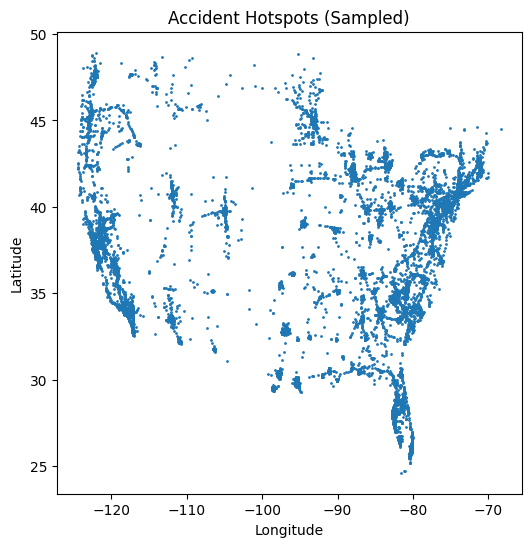

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(sample_df["Start_Lng"], sample_df["Start_Lat"], s=1)
plt.title("Accident Hotspots (Sampled)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [ ]:
def road_surface(condition):
    if pd.isna(condition):
        return "Unknown"
    condition = condition.lower()
    if "rain" in condition or "drizzle" in condition:
        return "Wet"
    elif "snow" in condition or "sleet" in condition or "ice" in condition:
        return "Snow/Ice"
    elif "fog" in condition or "mist" in condition:
        return "Foggy"
    elif "storm" in condition or "thunder" in condition:
        return "Storm"
    else:
        return "Dry"

df["Road_Surface_Condition"] = df["Weather_Condition"].apply(road_surface)

df["Road_Surface_Condition"].value_counts()

Road_Surface_Condition
Dry         6850801
Wet          538878
Snow/Ice     161637
Foggy        111807
Storm         65271
Name: count, dtype: int64

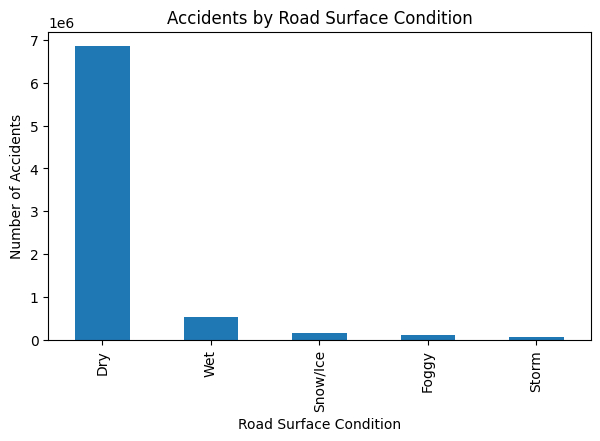

In [ ]:
surface_counts = df["Road_Surface_Condition"].value_counts()

import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
surface_counts.plot(kind="bar")
plt.title("Accidents by Road Surface Condition")
plt.xlabel("Road Surface Condition")
plt.ylabel("Number of Accidents")
plt.show()

**Final Observation**

1.The US Accidents March 2023 dataset was analyzed using a Kaggle Notebook and successfully loaded into pandas.

2.The dataset contains millions of records and 46 features, including time, location, weather, and road conditions.

3.Data inspection revealed missing values and mixed datetime formats, which were handled during preprocessing.

4.The Start_Time column was converted to datetime to enable time-based analysis.

5.Accident analysis by road surface condition showed that Dry roads have the highest number of accidents, followed by Wet roads.

6.Snow/Ice, Foggy, and Storm conditions contribute fewer accidents but indicate higher risk driving environments.

7.Visualizations helped clearly understand how road surface conditions impact accident frequency.